In [1]:
import cv2 # import opencv


In [2]:
import matplotlib.pyplot as plt

In [3]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [4]:
model = cv2.dnn_DetectionModel(frozen_model,config_file) # after dnn press tab this will give you options to comands

In [5]:
classLabels = [] # empty list of python
file_name = 'coco_labels.txt'
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
    #classLabels.append(fpt.read())

In [6]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
print(len(classLabels))

80


In [8]:
model.setInputSize(320,320) # as model is 320x320 in configuration file
model.setInputScale(1.0/127.5) ## 355/2 = 127.5
model.setInputMean((127.5,127.5,127.5)) ## mobilenet takes input as [-1,1]
model.setInputSwapRB(True) # so automatic conversion from BGR (OpenCV default) to RGB

<dnn_Model 000001AEC95D00F0>

# read an image

In [9]:
img = cv2.imread('man with car.jpg')

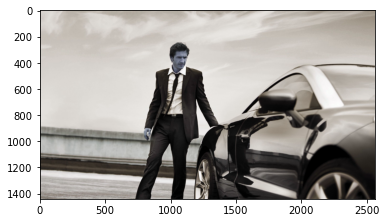

In [10]:
plt.imshow(img) # BGR image

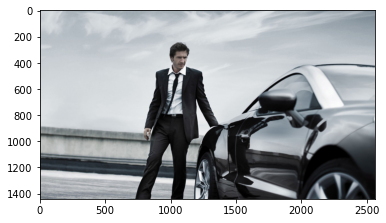

In [11]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [12]:
ClassIndex,confidence, bbox = model.detect(img,confThreshold = 0.5) # as model is already loaded, and it has 3 outputs
# since confidence level taken by us is 50% so 0.5, this parameter can be changed

In [13]:
print(ClassIndex)

[[3]
 [1]]


In [14]:
font_scale = 10
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf,boxes in zip (ClassIndex.flatten(), confidence.flatten(),bbox): # zip is used as 3 diff variables
    # cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2) # frame is image file name, rest two are coordinates, and then color (blue) and width or box line
    # cv2.putText(img,text,(text_offset_x,Text_offset_y), font, fontScale = font_scale, color = (0,0,0), thickness = 1)
    # the text in ClassLabels will be written in the box, and index is reduced by -1 as python start as zero index
    cv2.rectangle(img,boxes,(255,0,0),2) # rectangle is box
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font , fontScale = font_scale,color = (0,255,0),thickness=3)


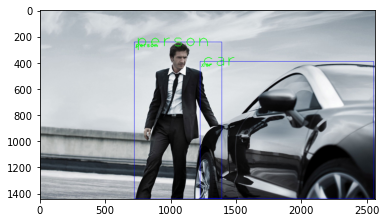

In [18]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [19]:
## Video demo

In [15]:
cap = cv2.VideoCapture("streeth video.mp4")



#check if video is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        raise IOError("Cannot open Video")
        

font_scale = 20
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    
    ClassIndex,confidence,bbox = model.detect(frame,confThreshold = 0.55)
    
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf,boxes in zip (ClassIndex.flatten(), confidence.flatten(),bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+100,boxes[1]+400), font , fontScale = font_scale,color = (0,255,0),thickness=3)
                
    
    cv2.imshow('Object Detection', frame)
    
    if cv2.waitKey(2) & 0xFF ==('q'):
        break
        

cap.release()
cv2.destroyAllWindows

[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]
 [1]
 [1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [3]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [7]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [3]]
[[1]
 [1]
 [3]]
[[1]
 [1]
 [1]
 [3]
 [1]]
[[1]
 [1]
 [3]
 [

KeyboardInterrupt: 